# Tinder is one of the most popular dating applications. It connects people having similar interests. To check whether Tinder helps people find partners, we can analyze the sentiments of people about Tinder. There are a lot of reviews on the Google Play Store about Tinder. We can use that data to analyze the sentiments of Tinder users. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("tinder.csv")
print(data.head())

                               reviewId       userName  \
0  2ee284b2-8239-4434-b2e0-e3ed60a67896  A Google user   
1  6682e590-eb30-4ded-84af-8f8243b56442  A Google user   
2  e6f5db1f-6364-4ade-9e50-a089777af6e1  A Google user   
3  2cd17dae-6488-4bbe-86db-a2e6e19da3af  A Google user   
4  9925c76e-0722-4890-8fa6-d62557fc4cfe  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  Was banned without any reason, didn't break an...      1              0   
1             no funciona! Sencillamente no funciona      1              0   
2                                  thank you so much      5              0   
3 

# On the first impressions of this dataset, I can see some null values in some columns. To analyze the Tinder reviews, we only need the content column. So let’s create a new dataset with the content column and move further:

In [2]:
data = data[["content"]]

# Now let’s see if we have null values in the content column:

In [3]:
data.isnull().sum()

content    1362
dtype: int64

# The content column also contains null values, let’s remove the null values and move on:




In [4]:
data = data.dropna()

# Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:

In [5]:

stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

# Now let’s have a look at the kind of words people use in the reviews of Tinder:

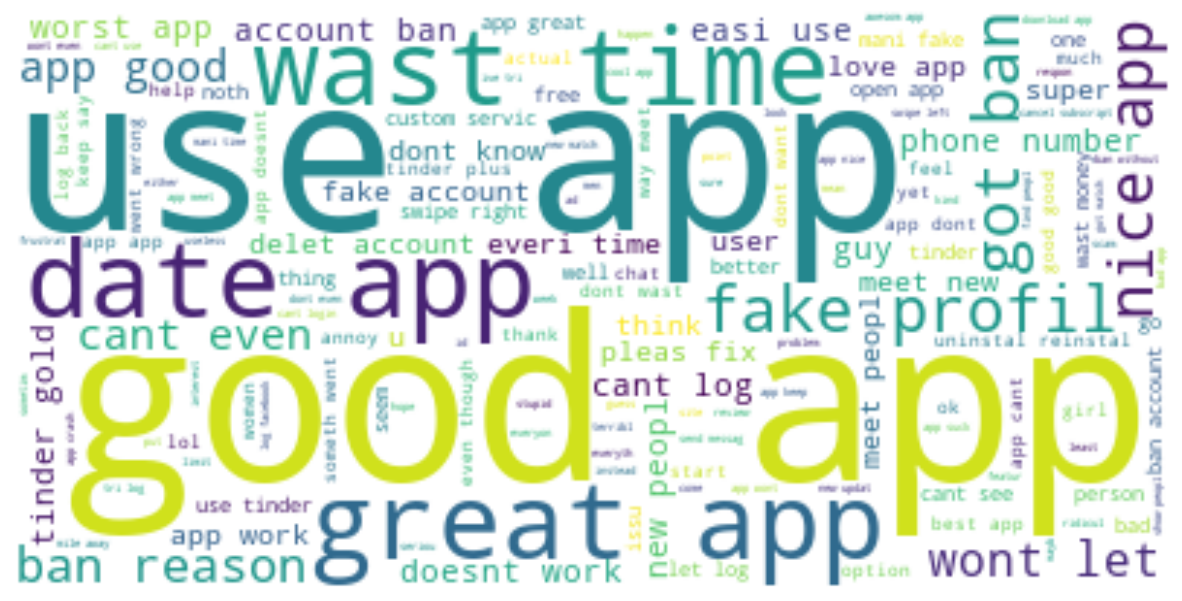

In [6]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:



In [7]:

sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

                                             content  Positive  Negative  \
0  ban without reason didnt break therm use tri a...     0.000     0.265   
1                     funciona sencillament funciona     0.000     0.000   
2                                         thank much     0.714     0.000   
3  fake profil most peopl tri scam use app blackmail     0.000     0.502   
4  cant anyth match distanc calcul incorrect huge...     0.204     0.000   

   Neutral  
0    0.735  
1    1.000  
2    0.286  
3    0.498  
4    0.796  


# Now let’s have a look at the kind of words people use in the positive reviews of Tinder:

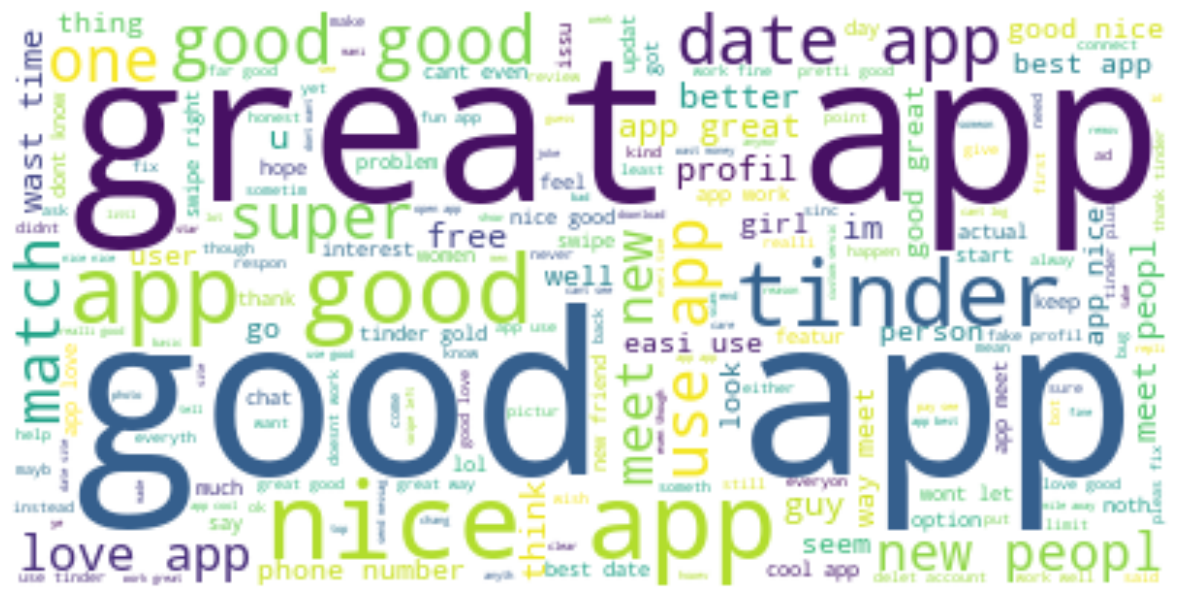

In [8]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Now let’s have a look at the kind of words people use in the negative reviews of Tinder:

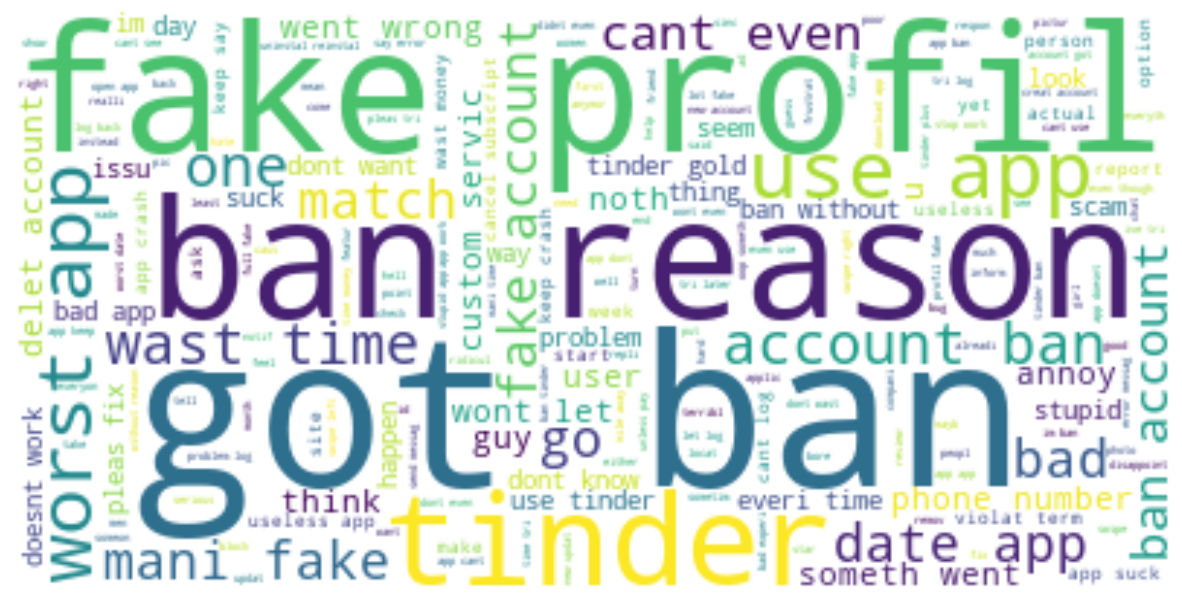

In [9]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Let’s have a look at the overall sentiment score of the users of Tinder:

In [10]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


# So most of the users write reviews neutrally. Let’s have a look at the total of all the sentiment scores:

In [11]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  185010.61400002582
Negative:  75089.91899999473
Neutral:  371343.45799992466


# summary:

# As you can see, the positive is much more than the negative, we can say that most users are happy with Tinder.

